In [9]:
import json, base64, io, numpy as np, os
from PIL import Image
import matplotlib.pyplot as plt
import requests, urllib

In [4]:
def clip_prefix(s):
  q = s.index("base64")
  return s[q + 6:]

def pull(s):
  if s.startswith("data:image"):
    path = clip_prefix(s)
    b64 = base64.b64decode(path)
    image = Image.open(io.BytesIO(b64))
    return image
  else:
    r = requests.get(s)
    if r.status_code == 200:
      return Image.open(io.BytesIO(r.content))
    return None
    

In [5]:
with open("json_files/naver.json", "r") as f:
  obj = json.load(f)
  imgs = []
  for path in obj:
    imgs.append(pull(path))

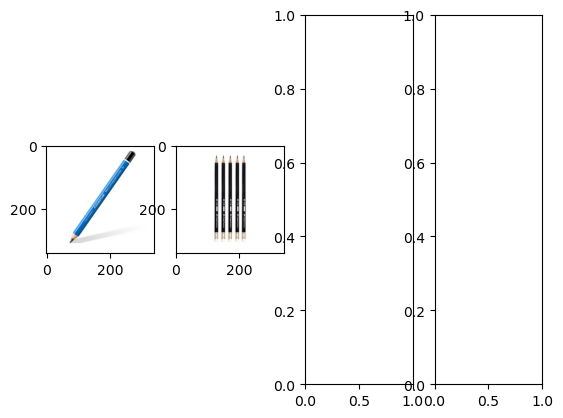

In [8]:
c = 4
rows = (len(imgs) + c - 1) // c
f, axarr = plt.subplots((len(imgs) + c - 1) // c, c)
if rows == 1:
  axarr = [axarr]
for i, v in enumerate(imgs):
  if v is not None:
    v = np.array(v)
    if len(v.shape) == 2:
      v = np.tile(v[:,:,None], (1, 1, 3))
    axarr[i // c][i % c].imshow(v)
  else:
    axarr[i // c][i % c].text(0, 0, "null")

In [11]:
output_folder = "output_folder"

for i, v in enumerate(imgs):
  if v.mode in ["RGBA", "P"]:
    v = v.convert("RGB")
  v.save(os.path.join(output_folder, f"{i}.png"))